<a href="https://colab.research.google.com/github/donxuiqote/riset_informatika_c081/blob/main/data_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns


Pengambilan Data Review

In [5]:
!pip install google-play-scraper
from google_play_scraper import Sort, reviews
result, continuation_token = reviews(
'com.kai.kaiticketing',
lang='id',
country='id',
sort=Sort.MOST_RELEVANT,
count=10000, # defaults to 100
filter_score_with=None
)

Pre Processing

In [6]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
scrappeddata1 = data[['content','score','at']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=True)
sorteddata.head()

,content,score,at
4623,"PT. KAI yg terhormat, tolong aplikasi ini diti...",3,2018-09-16 05:45:00
6276,Akhir2 ini saya booking lewat aplikasi ini ker...,2,2018-09-16 10:49:44
9141,"Aplikasinya lumayan membantu, cuma saja kenapa...",5,2018-09-17 01:07:00
3906,Dari dulu sampai sekarang masih belum bisa nge...,1,2018-09-23 23:19:47
9455,Lebih bagus yang sebelumnya. Karena setelah up...,4,2018-09-24 04:22:52


In [7]:
sorteddata['Year'] = sorteddata['at'].dt.year
sorteddata['Month'] = sorteddata['at'].dt.month
sorteddata['Day'] = sorteddata['at'].dt.day
sorteddata

,content,score,at,Year,Month,Day
4623,"PT. KAI yg terhormat, tolong aplikasi ini diti...",3,2018-09-16 05:45:00,2018,9,16
6276,Akhir2 ini saya booking lewat aplikasi ini ker...,2,2018-09-16 10:49:44,2018,9,16
9141,"Aplikasinya lumayan membantu, cuma saja kenapa...",5,2018-09-17 01:07:00,2018,9,17
3906,Dari dulu sampai sekarang masih belum bisa nge...,1,2018-09-23 23:19:47,2018,9,23
9455,Lebih bagus yang sebelumnya. Karena setelah up...,4,2018-09-24 04:22:52,2018,9,24
...,...,...,...,...,...,...
3593,"Biasa, habis update jadi ngaco. Isi pulsa dan ...",1,2023-12-15 15:48:01,2023,12,15
735,KAI Access ini sering banget bermasalah di pem...,1,2023-12-15 17:31:27,2023,12,15
77,Makin diupdate mw bayar selalu gagal menunya.....,1,2023-12-15 20:44:59,2023,12,15
215,Gak lagi² gua beli pulsa lewat ni aplikasi.. s...,5,2023-12-15 21:57:09,2023,12,15


In [8]:
df = sorteddata[['content','score','Year','Month','Day']]
df

,content,score,Year,Month,Day
4623,"PT. KAI yg terhormat, tolong aplikasi ini diti...",3,2018,9,16
6276,Akhir2 ini saya booking lewat aplikasi ini ker...,2,2018,9,16
9141,"Aplikasinya lumayan membantu, cuma saja kenapa...",5,2018,9,17
3906,Dari dulu sampai sekarang masih belum bisa nge...,1,2018,9,23
9455,Lebih bagus yang sebelumnya. Karena setelah up...,4,2018,9,24
...,...,...,...,...,...
3593,"Biasa, habis update jadi ngaco. Isi pulsa dan ...",1,2023,12,15
735,KAI Access ini sering banget bermasalah di pem...,1,2023,12,15
77,Makin diupdate mw bayar selalu gagal menunya.....,1,2023,12,15
215,Gak lagi² gua beli pulsa lewat ni aplikasi.. s...,5,2023,12,15


In [19]:
df.to_csv ('dataset.csv', index = None, header=True)

In [10]:
df['score'].value_counts()

1    6959
2    1386
3     759
5     579
4     317
Name: score, dtype: int64

<Axes: xlabel='score'>

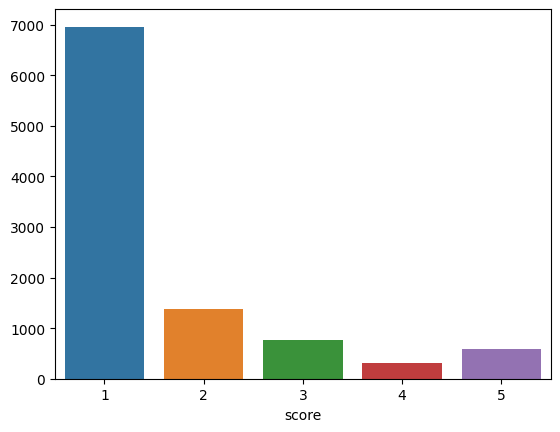

In [15]:
result = df.groupby(['score']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

In [18]:
sentimen = []
for index, row in df.iterrows():
  if row['score'] > 3:
    sentimen.append(1)
  elif row['score'] == 3:
    sentimen.append(0)
  else:
    sentimen.append(-1)
df['sentiment'] = sentimen
df.head()

,content,score,Year,Month,Day,sentiment
4623,"PT. KAI yg terhormat, tolong aplikasi ini diti...",3,2018,9,16,0
6276,Akhir2 ini saya booking lewat aplikasi ini ker...,2,2018,9,16,-1
9141,"Aplikasinya lumayan membantu, cuma saja kenapa...",5,2018,9,17,1
3906,Dari dulu sampai sekarang masih belum bisa nge...,1,2018,9,23,-1
9455,Lebih bagus yang sebelumnya. Karena setelah up...,4,2018,9,24,1


In [ ]:
df_new = df[['Year', 'Month', 'sentiment']]
result = df_new.groupby(['sentiment']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'grey', 'green')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_new['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiment')

In [ ]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('red', 'grey', 'green')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_new['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiment')

In [ ]:
df3 = df_new.groupby(['Year','sentiment'])['sentiment'].count()
df3

In [ ]:
df['content'] = df['content'].str.replace('https\S+', ' ', case=False)
df['content'] = df['content'].str.lower()
df['content'] = df['content'].str.replace('@\S+', ' ', case=False)
df['content'] = df['content'].str.replace('#\S+', ' ', case=False)
df['content'] = df['content'].str.replace("\'\w+", ' ', case=False)
df['content'] = df['content'].str.replace("[^\w\s]", ' ', case=False)
df['content'] = df['content'].str.replace("\s(2)", ' ', case=False)
# impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize
#df['content']=df.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['content_token']=df['content'].apply(regexp.tokenize)
df.head(3)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Make a list of Indonesian stopwords
stopwords = nltk.corpus.stopwords.words("indonesian")
# Extend the list with your own custom stopwords
my_stopwords = ['kai']
stopwords.extend(my_stopwords)
# Remove stopwords
df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

In [ ]:
!pip install Sastrawi
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
df.head(5)


In [ ]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df.head(5)

In [ ]:
df['text_string'] = df['text_string'].astype('str')
df['text_string'] = df['text_string'].astype(pd.StringDtype())
df.dtypes

In [ ]:
!pip install wordcloud

In [ ]:
df_p=df[df['sentiment']==1]
all_words_lem = ' '.join([word for word in df_p['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
df_neg=df[df['sentiment']==-1]
all_words_lemneg = ' '.join([word for word in df_neg['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemneg)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
df_net=df[df['sentiment']==0]
all_words_lemnet = ' '.join([word for word in df_net['text_string']])
%matplotlib inline

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemnet)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics
# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
X = df['text_string']
y = df['sentiment']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [ ]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3)
#random forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

In [ ]:
# initialize list of lists
data_akurasi = [[90,10,88.28,87.41,71.99], [80,20,87.37,86.78,72.46],[70,30,86.57,86.78,72.07],[60,40,85.20,85.65,71.60],[50,50,84.06,84.75,70.86],[40,60,81.76,82.92,69.35],[30,70,79.49,81.94,68.73],[20,80,66.59,79.21,66.59],[10,90,69.96,76.60,63.89]]

# Create the pandas DataFrame
df_akurasi = pd.DataFrame(data_akurasi, columns=['data_train', 'data_tes', 'random_fores', 'SVM', 'naive_bayes'])

# print dataframe.
df_akurasi

In [ ]:
plt.plot(df_akurasi['data_train'], df_akurasi['random_fores'], 'g', label='Random Forest')
plt.plot(df_akurasi['data_train'], df_akurasi['SVM'], 'r', label='SVM')
plt.plot(df_akurasi['data_train'], df_akurasi['naive_bayes'], 'y', label='Naive Bayes')
plt.xlabel('Jumlah Data Train dalam %', fontsize=18)
plt.ylabel('Nilai Akurasi dalam %', fontsize=16)
plt.legend()
plt.show()

In [ ]:
#sorting berdasarkan data train ascending
df_akurasi = df_akurasi.sort_values(by='data_train', ascending=True)
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]
# Set position of bar on X axis
br1 = np.arange(len(df_akurasi['random_fores']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# Make the plot
plt.bar(br1, df_akurasi['random_fores'], color ='orange', width = barWidth,
  edgecolor ='grey', label ='Random Forest')
plt.bar(br2, df_akurasi['SVM'], color ='b', width = barWidth,
  edgecolor ='grey', label ='svm')
plt.bar(br3, df_akurasi['naive_bayes'], color ='magenta', width = barWidth,
  edgecolor ='grey', label ='Naive Bayes')
plt.ylim(40, 90)
# Adding Xticks
plt.xlabel('Data Train dalam %', fontweight ='bold', fontsize = 15)
plt.ylabel('Akurasi dalam %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(df_akurasi['random_fores']))],
  df_akurasi['data_train'])
plt.legend()
plt.show()